<a href="https://colab.research.google.com/github/nedprz/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/Ned_Przezdziecki_LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
true_positive_rate = 1
false_positive_rate = .08
prob_drunk_prior = .001

a=.001
b=.08
c=1


In [0]:
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate,true_positive_rate):
  num = (true_positive_rate*prob_drunk_prior)
  denom = (true_positive_rate * prob_drunk_prior)+(false_positive_rate*(1-prob_drunk_prior))
  return num/denom

In [0]:
prob_drunk_given_positive(a,b,c)

0.012357884330202669

In [0]:
a= prob_drunk_given_positive(prob_drunk_given_positive(a,b,c),b,c)
a

0.13525210993291495

In [0]:
#after 3 trials, we are greater than 95% sure that the driver is above the legal limit

In [0]:
#Explore scipy.stats.bayes_mvs

#Read its documentation, and experiment with it on data you've tested in other ways earlier this week.

   # Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. 
   #(with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. 
   #The following are some potential ways that you could visualize confidence intervals on your graph:

In [0]:
# Grab the file from UCI:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-04-15 20:54:24--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2020-04-15 20:54:24 (616 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']

df = pd.read_csv('house-votes-84.data', names=column_headers)

print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
# Categorical encoding: replace strings that represent specific categories with integers.
df = df.replace({'y': 1, 'n': 0, '?': np.NaN})

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  sample = np.array(data)
  # SAMPLE standard deviation: s
  s = np.std(sample, ddof=1 )
  # Sample Size
  n = len(sample)
  standard_error = s / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2, n-1)
  margin_of_error = t*standard_error
  x_bar = np.mean(sample)
  lower_bound = x_bar - margin_of_error
  upper_bound = x_bar + margin_of_error
  return (lower_bound, x_bar, upper_bound)

In [0]:
# Use dataframe filtering to generate two samples

dem = df[df['party']=='democrat'].dropna()
rep = df[df['party']=='republican'].dropna()

In [0]:
lower, mean, upper = confidence_interval( dem['crime'], confidence=.95)

In [0]:
print(mean, ' + or - ' , (mean-lower))
print( lower)

0.3467741935483871  + or -  0.08494631621297066
0.26182787733541646


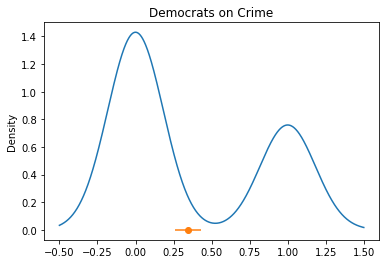

In [0]:
dem['crime'].plot.density()
plt.title('Democrats on Crime')
#plt.axvline(x=lower, color='red')
#plt.axvline(x=mean, color='black')
#plt.axvline(x=upper, color='red')

plt.errorbar(mean, 0, xerr=(mean-lower), fmt='o')
plt.show()



In [0]:
a,b,c = stats.bayes_mvs(dem['crime'], alpha=.95)

a

Mean(statistic=0.3467741935483871, minmax=(0.26182787733541646, 0.4317205097613578))

In [0]:
sns.distplot(dem['crime'])

In [0]:
sample_means = []
for x in range(3000):
    m = np.random.choice(dem['crime'],200).mean()
    sample_means.append(m)

In [0]:
from scipy.stats import bayes_mvs
m=bayes_mvs(dem['crime'])

In [0]:
sns.distplot(sample_means)
plt.axvline(x=m[0][0], color='black')
plt.axvline(x=m[0][1][0], color='black')
plt.axvline(x=m[0][1][1], color='black')





In [0]:
 #In your own words, summarize the difference between Bayesian and Frequentist statistics

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!